In [1]:
!pip install rdkit
!pip install pubchempy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 45.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13819 sha256=3b407421a67135cea5b184aded1bd5b14c3b22875c9ec212677b8a35747d929f
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy


In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.DataManip.Metric import GetTanimotoSimMat
from rdkit import DataStructs
import pandas as pd
import numpy as np
import seaborn as sns
import pubchempy as pcp

In [3]:
drug = pcp.Compound.from_cid(46188928)
mol_1 = pcp.Compound.from_cid(45274003)
mol_2 = pcp.Compound.from_cid(46188750)
mol_3 = pcp.Compound.from_cid(46188751)
mol_4 = pcp.Compound.from_cid(58386263)
mol_5 = pcp.Compound.from_cid(58386268)
mol_6 = pcp.Compound.from_cid(58386284)
mol_7 = pcp.Compound.from_cid(46188929)
mol_8 = pcp.Compound.from_cid(46189278)

In [4]:
drug_smiles = drug.isomeric_smiles
mol_1_smiles = mol_1.isomeric_smiles
mol_2_smiles = mol_2.isomeric_smiles
mol_3_smiles = mol_3.isomeric_smiles
mol_4_smiles = mol_4.isomeric_smiles
mol_5_smiles = mol_5.isomeric_smiles
mol_6_smiles = mol_6.isomeric_smiles
mol_7_smiles = mol_7.isomeric_smiles
mol_8_smiles = mol_8.isomeric_smiles

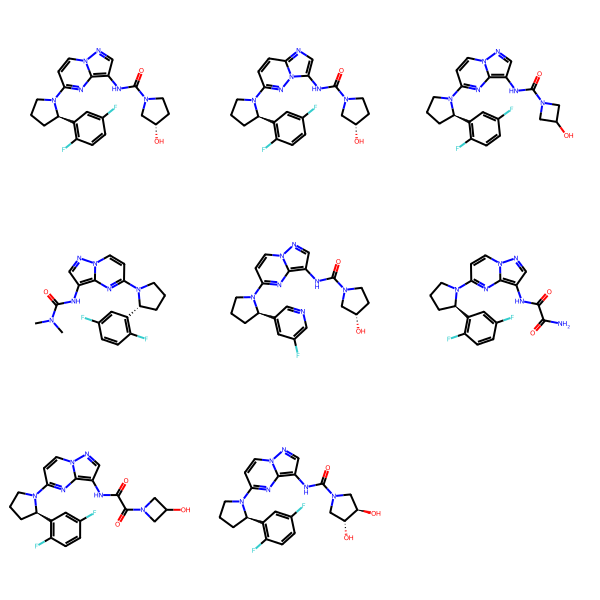

In [5]:
drug_struct = Chem.MolFromSmiles(drug_smiles)
mol_1_struct = Chem.MolFromSmiles(mol_1_smiles)
mol_2_struct = Chem.MolFromSmiles(mol_2_smiles)
mol_3_struct = Chem.MolFromSmiles(mol_3_smiles)
mol_4_struct = Chem.MolFromSmiles(mol_4_smiles)
mol_5_struct = Chem.MolFromSmiles(mol_5_smiles)
mol_6_struct = Chem.MolFromSmiles(mol_6_smiles)
mol_7_struct = Chem.MolFromSmiles(mol_7_smiles)
mol_8_struct = Chem.MolFromSmiles(mol_8_smiles)





molecules = [drug_struct, mol_1_struct, mol_2_struct, mol_3_struct, mol_4_struct, mol_5_struct, mol_6_struct, mol_7_struct, mol_8_struct]
molecules_image = [mol_1_struct, mol_2_struct, mol_3_struct, mol_4_struct, mol_5_struct, mol_6_struct, mol_7_struct, mol_8_struct]


Draw.MolsToGridImage(molecules[:8])

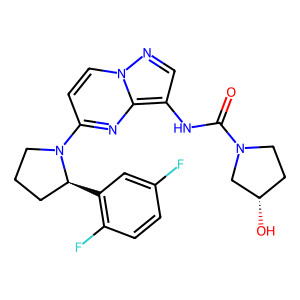

In [6]:
Draw.MolToImage(drug_struct)

In [7]:
fp_generation = AllChem.GetRDKitFPGenerator()
fps = [fp_generation.GetFingerprint(x) for x in molecules]

# Tanimoto 

In [8]:
Tanimoto_sims = {}

for i in range(0,9):
    for j in range(0,9):
            Tanimoto_sims[i,j] = 0
            Tanimoto_sims[i,j] += DataStructs.TanimotoSimilarity(fps[i], fps[j])
            


In [9]:
Tanimoto_sims

{(0, 0): 1.0,
 (0, 1): 0.7410358565737052,
 (0, 2): 0.9655172413793104,
 (0, 3): 0.9460708782742681,
 (0, 4): 0.8680605623648161,
 (0, 5): 0.8905547226386806,
 (0, 6): 0.8918128654970761,
 (0, 7): 0.9946360153256705,
 (0, 8): 0.8601398601398601,
 (1, 0): 0.7410358565737052,
 (1, 1): 1.0,
 (1, 2): 0.7136243386243386,
 (1, 3): 0.6945551128818062,
 (1, 4): 0.6668789808917197,
 (1, 5): 0.6730137885751806,
 (1, 6): 0.685364281108962,
 (1, 7): 0.7399073461283918,
 (1, 8): 0.6735202492211838,
 (2, 0): 0.9655172413793104,
 (2, 1): 0.7136243386243386,
 (2, 2): 1.0,
 (2, 3): 0.9692186266771902,
 (2, 4): 0.8377602297200287,
 (2, 5): 0.9088122605363985,
 (2, 6): 0.8968842729970327,
 (2, 7): 0.9603658536585366,
 (2, 8): 0.8333333333333334,
 (3, 0): 0.9460708782742681,
 (3, 1): 0.6945551128818062,
 (3, 2): 0.9692186266771902,
 (3, 3): 1.0,
 (3, 4): 0.8175919250180245,
 (3, 5): 0.9352801894238358,
 (3, 6): 0.8932330827067669,
 (3, 7): 0.9409961685823754,
 (3, 8): 0.8111888111888111,
 (4, 0): 0.868060

In [10]:
morganfps = [AllChem.GetMorganFingerprintAsBitVect(m,2) for m in molecules]

In [11]:
simmat = GetTanimotoSimMat(morganfps)

In [12]:
print(simmat, len(simmat))
print(len(molecules))

[0.61842105 0.90625    0.55128205 0.71428571 0.43373494 0.73529412
 0.76056338 0.45882353 0.68493151 0.53164557 0.72463768 0.43902439
 0.74626866 0.76923077 0.53846154 0.79710145 0.5        0.84848485
 0.71428571 0.6025641  0.7761194  0.87692308 0.53164557 0.9047619
 0.73529412 0.66216216 0.74626866 0.76811594 0.82857143 0.51190476
 0.75       0.58974359 0.72       0.5974026  0.66233766 0.7260274 ] 36
9


In [13]:
def tri2mat(tri_arr):
    n = len(tri_arr)
    m = int((np.sqrt(1+4*2*n)+1)/2)
    arr = np.ones([m,m])
    for i in range(m):
        for j in range(i):
            arr[i][j] = tri_arr[i+j-1]
            arr[j][i] = tri_arr[i+j-1]
    return arr

In [14]:
simmat = tri2mat(simmat)

<Axes: >

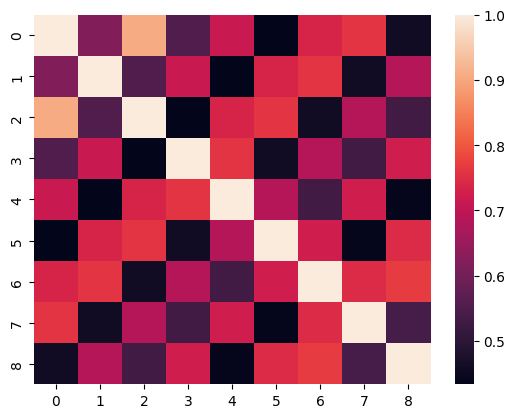

In [15]:
sns.heatmap(simmat[:9, :9])

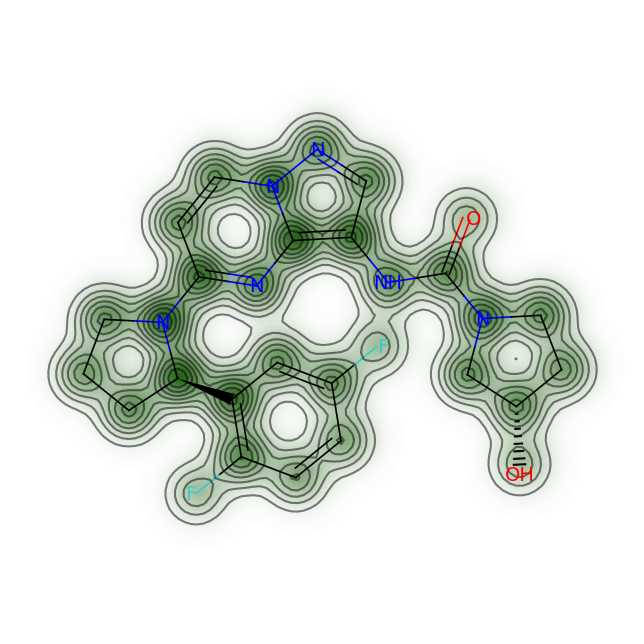

In [16]:
fig1, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(drug_struct, drug_struct, SimilarityMaps.GetMorganFingerprint, metric=DataStructs.TanimotoSimilarity)

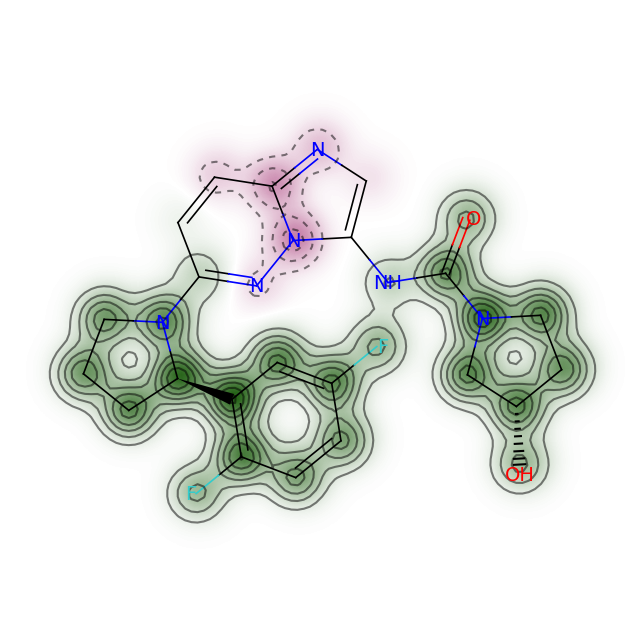

In [17]:
fig2, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(drug_struct, mol_1_struct, SimilarityMaps.GetMorganFingerprint, metric=DataStructs.TanimotoSimilarity)

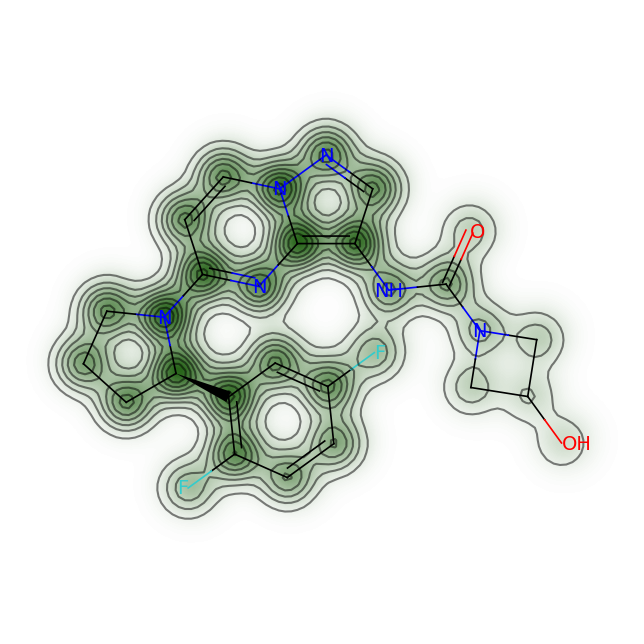

In [18]:
fig3, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(drug_struct, mol_2_struct, SimilarityMaps.GetMorganFingerprint, metric=DataStructs.TanimotoSimilarity)

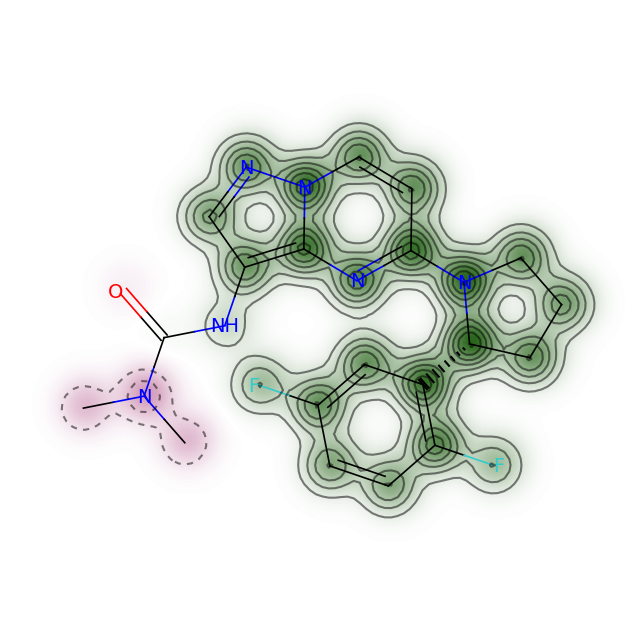

In [19]:
fig3, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(drug_struct, mol_3_struct, SimilarityMaps.GetMorganFingerprint, metric=DataStructs.TanimotoSimilarity)

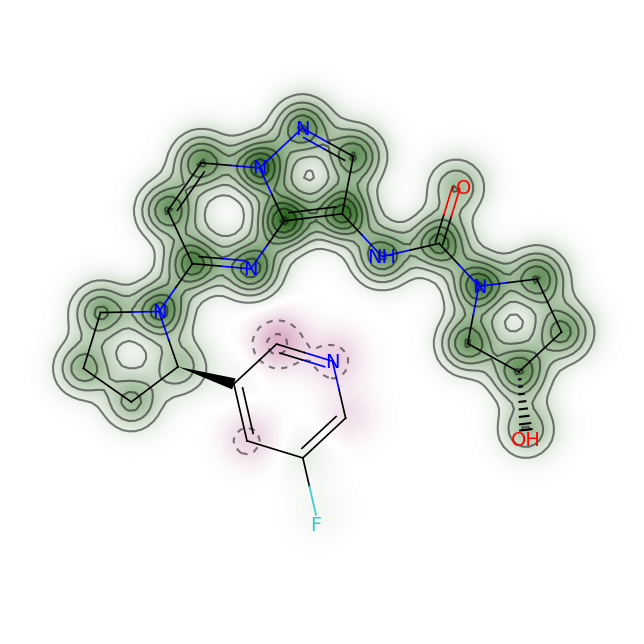

In [20]:
fig4, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(drug_struct, mol_4_struct, SimilarityMaps.GetMorganFingerprint, metric=DataStructs.TanimotoSimilarity)

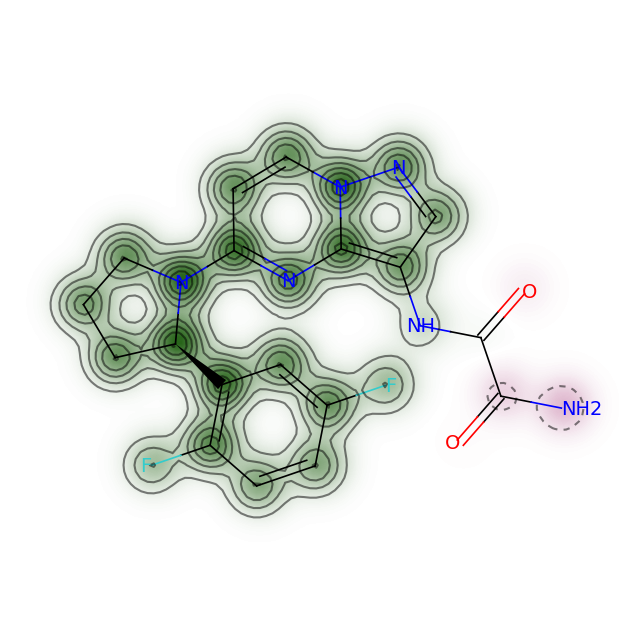

In [21]:
fig5, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(drug_struct, mol_5_struct, SimilarityMaps.GetMorganFingerprint, metric=DataStructs.TanimotoSimilarity)

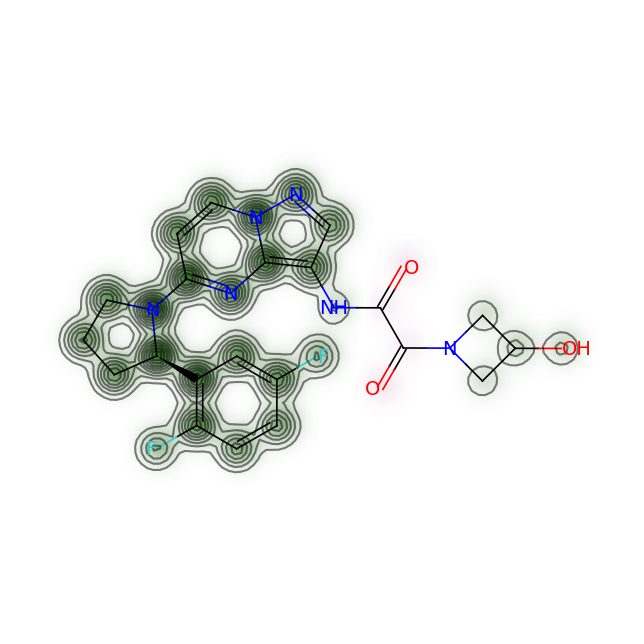

In [22]:
fig6, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(drug_struct, mol_6_struct, SimilarityMaps.GetMorganFingerprint, metric=DataStructs.TanimotoSimilarity)

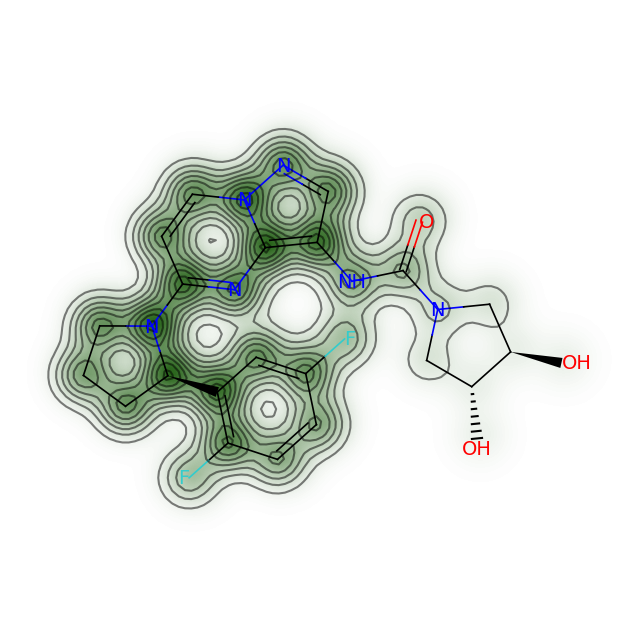

In [23]:
fig7, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(drug_struct, mol_7_struct, SimilarityMaps.GetMorganFingerprint, metric=DataStructs.TanimotoSimilarity)

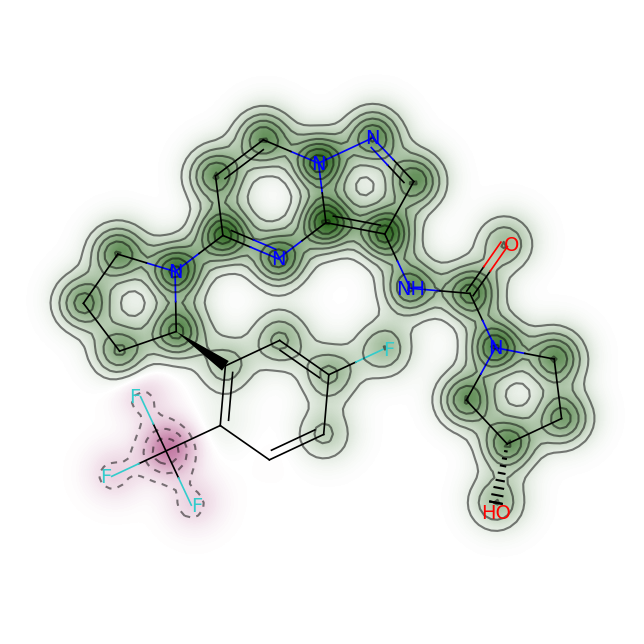

In [24]:
fig8, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(drug_struct, mol_8_struct, SimilarityMaps.GetMorganFingerprint, metric=DataStructs.TanimotoSimilarity)